In [1]:
import seaborn as sns


In [2]:
df = sns.load_dataset('taxis')


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [4]:
df


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


<AxesSubplot:xlabel='distance', ylabel='total'>

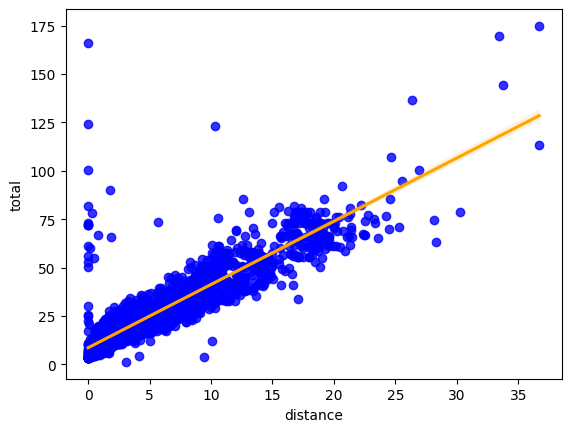

In [6]:
sns.regplot(x='distance', y='total', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})


Na wykresie wyżej widać, że wraz ze wzrostem dystansu do pokonania, wzrasta opłata za przejazd.


<AxesSubplot:xlabel='total', ylabel='tip'>

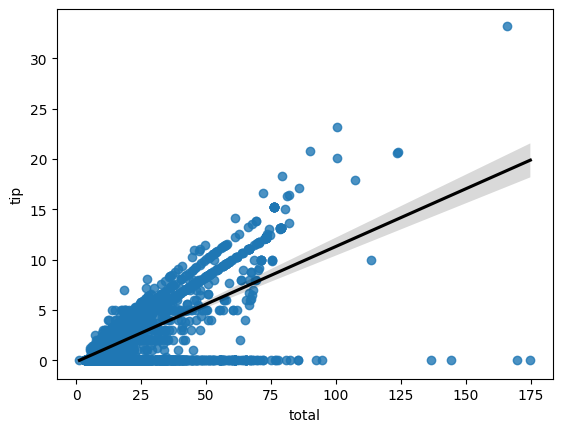

In [9]:
sns.regplot(x='total', y='tip', data=df, line_kws={'color': 'black'})


Na wykresie wyżej widać, że wraz ze wzrostem opłaty za przejazd, zwiększa się napiwaek dla kierowcy.


<AxesSubplot:xlabel='payment', ylabel='count'>

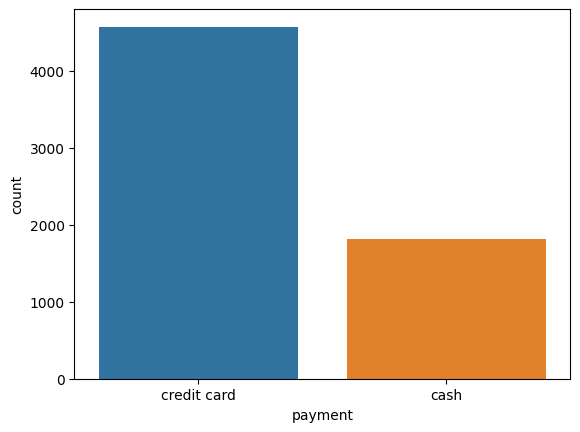

In [7]:
sns.countplot(x='payment', data=df)


Na wykresie wyżej widać, że zdecydowna większość metod zapłaty, to płacenie kartą.


<AxesSubplot:xlabel='passengers', ylabel='total'>

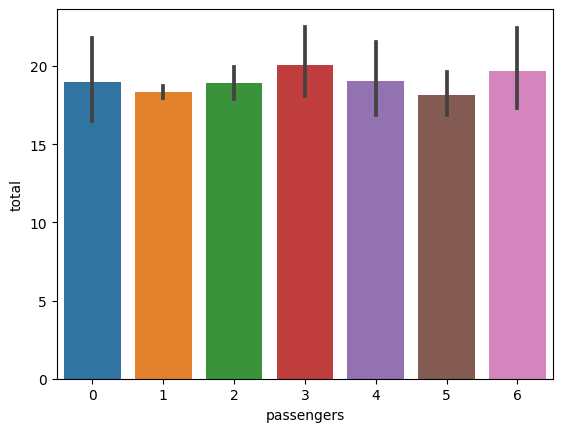

In [8]:
sns.barplot(x='passengers', y='total', data=df)


Wykres powyżej pokazuje, że ilość pasażerów nie ma większego wpływu na koszt przejazdu.


In [11]:
df[df.pickup_borough == df.dropoff_borough].total.mean()


14.892925474740236

In [12]:
df[df.pickup_borough != df.dropoff_borough].total.mean()


42.29454759106933

Widać olbrzymią różnicę w koszcie przejazdu, jeżeli miejsce startu i końca znajdują się w innym regionie.


<AxesSubplot:ylabel='Count'>

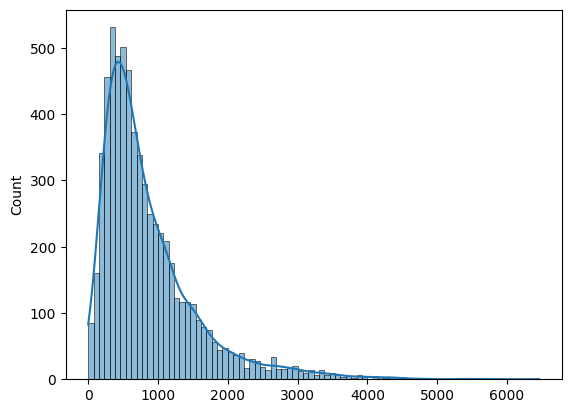

In [22]:
sns.histplot((df.dropoff - df.pickup).dt.seconds, kde=True)


Wykres powyżej pokazuje, że większość przejazdów trwała mniej niż 1000 sekund.
